# Predict Heart Disease Using Machine Learning

This notebook looks into using various Python-based machine learning and Data Science Libraries in attempt to build a machine learning model capable of predicting weather a person has heart disease or not based on their madical attributes.

We're going to take the following approach:
1. Problem Defination
2. Data
3. Evaluating 
4. Featuring 
5. Modeling
6. Experimention

## 1. Problem Defination

In a statement, 
> Given clinical parameters about the peteints, can we predict weather the they have heart disease or not?

## 2. Data

The original data came from Cleveland data UCI machine learning repository https://archive.ics.uci.edu/dataset/45/heart+disease

There is also a version of this data on kaggle. https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data

## 3. Evalution 
> If reach 90% accuracy in predicting the heart disease then then will further go with this project.


## 4. Features 

This is where you get the information about the different features of your data.
**Date Dictionary**

1. age (Age of the patient in years)
2. sex (Male/Female)(1 = male; 0 = female)
3. cp chest pain type 
    - Value 1: typical angina
    - Value 2: atypical angina
    - Value 3: non-anginal pain
    - Value 4: asymptomatic
4. trestbps resting blood pressure (resting blood pressure (in mm Hg on admission to the hospital))
5. chol (serum cholesterol in mg/dl)
6. fbs (if fasting blood sugar > 120 mg/dl)
    (1 = true; 0 = false)
7. restecg (resting electrocardiographic results)
    - Value 0: normal
    - Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    - Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
8. thalach: maximum heart rate achieved
9. exang: exercise-induced angina (True/ False)
10. oldpeak: ST depression induced by exercise relative to rest
11. slope: the slope of the peak exercise ST segment
    - Value 1: upsloping
    - Value 2: flat
    - Value 3: downsloping
12. ca: number of major vessels (0-3) colored by fluoroscopy
13. thal: 
    - 3 = normal;
    - 6 = fixed defect;
    - 7 = reversable defect
14. num/target: the predicted attribute (0 or 1)
    - Value 0: < 50% diameter narrowing
    - Value 1: > 50% diameter narrowing
    - (in any major vessel: attributes 59 through 68 are vessels)

## Preparing The Tools

We're going to use pandas, numpy, matplotlib and scikit-leanrn libraries for this project.

In [1]:
#Importing all the tools

# Regular EDA (Exploratory data analysis ) and ploting libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# want appear plot in side notebook
%matplotlib inline 

# Models from scikit-learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Estimators
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import precision_score, f1_score, recall_score
from sklearn.metrics import roc_curve


## Load Data

In [2]:
df = pd.read_csv("heart-disease.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
# Data Exploration EDA
df["target"].value_counts()

target
1    165
0    138
Name: count, dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [6]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


## Heart disease frequency according to sex

In [8]:
# values of sex male and female

df.sex.value_counts()

sex
1    207
0     96
Name: count, dtype: int64

In [9]:
# no of male and female have heart disease according to our data
pd.crosstab(df.sex, df.target)

target,0,1
sex,,
0,24,72
1,114,93


(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

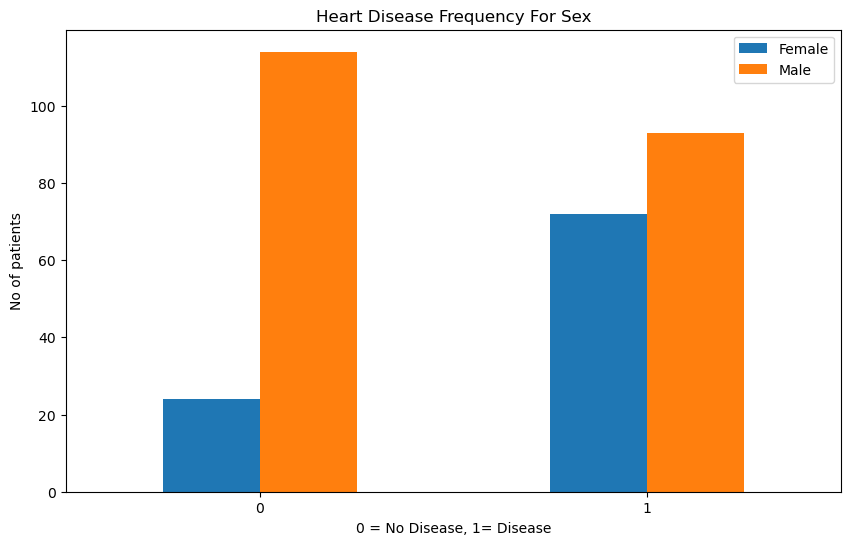

In [10]:
pd.crosstab( df.target,df.sex).plot(kind="bar",
                                   figsize=(10,6))
plt.title("Heart Disease Frequency For Sex")
plt.xlabel("0 = No Disease, 1= Disease")
plt.ylabel("No of patients")
plt.legend(["Female", "Male"])
plt.xticks(rotation=0)

In [11]:
df[["age","thalach","target"]].corr()

,age,thalach,target
age,1.000000,-0.398522,-0.225439
thalach,-0.398522,1.000000,0.421741
target,-0.225439,0.421741,1.000000


In [12]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## Avg vs Max Heart Rate For Disease

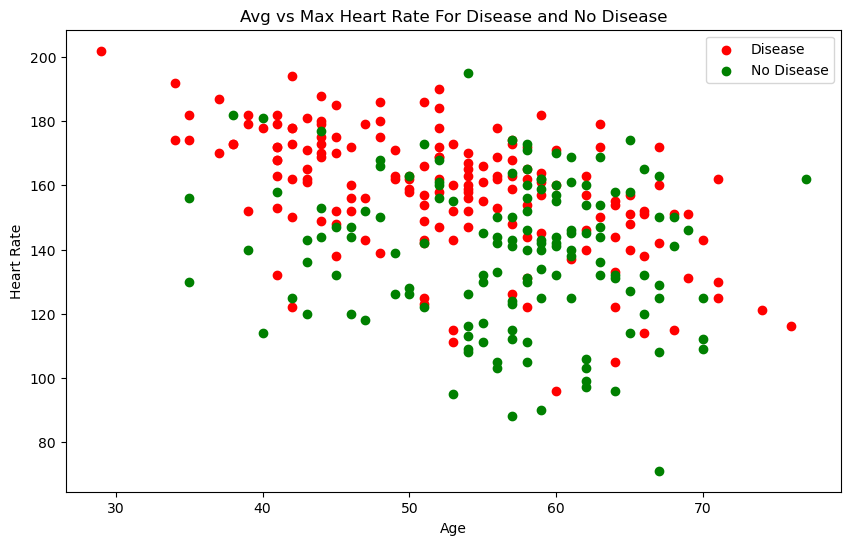

In [13]:
plt.figure(figsize=(10, 6))

# ploting scatter plot for age and heart rate with disease
plt.scatter(df.age[df.target==1],
            df.thalach[df.target==1],c="red" 
           )
#ploting scatter plot for age and heart rate without disease
plt.scatter(df.age[df.target==0],
            df.thalach[df.target==0],c="green" 
           )
plt.title("Avg vs Max Heart Rate For Disease and No Disease")
plt.xlabel("Age")
plt.ylabel("Heart Rate")
plt.legend(["Disease", "No Disease"])


<Axes: ylabel='Frequency'>

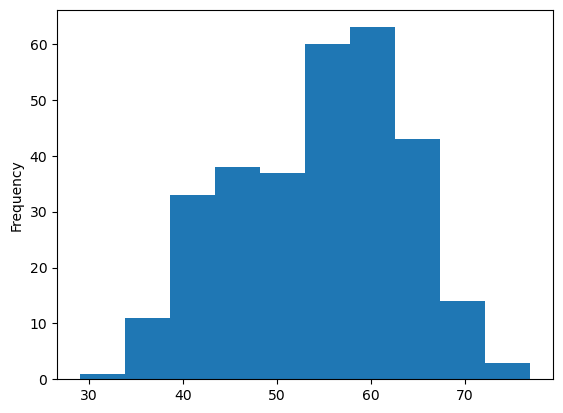

In [14]:
#Distribution of age columne
df.age.plot.hist()

## Heart Disease Frequency per Chest Pain Type

3. cp chest pain type 
    - Value 1: typical angina
    - Value 2: atypical angina
    - Value 3: non-anginal pain
    - Value 4: asymptomatic

In [15]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


(array([0, 1, 2, 3]),
 [Text(0, 0, '0'), Text(1, 0, '1'), Text(2, 0, '2'), Text(3, 0, '3')])

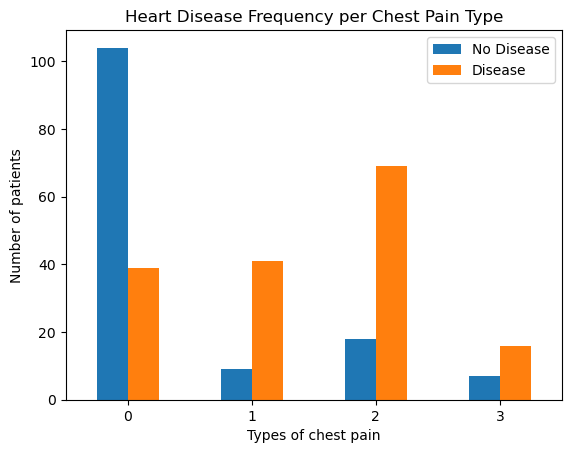

In [16]:
#plot for chest pain and target value

pd.crosstab(df.cp, df.target).plot(kind="bar")
plt.title("Heart Disease Frequency per Chest Pain Type")
plt.xlabel("Types of chest pain")
plt.ylabel("Number of patients")
plt.legend(["No Disease", "Disease"])
plt.xticks(rotation=0)


In [17]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


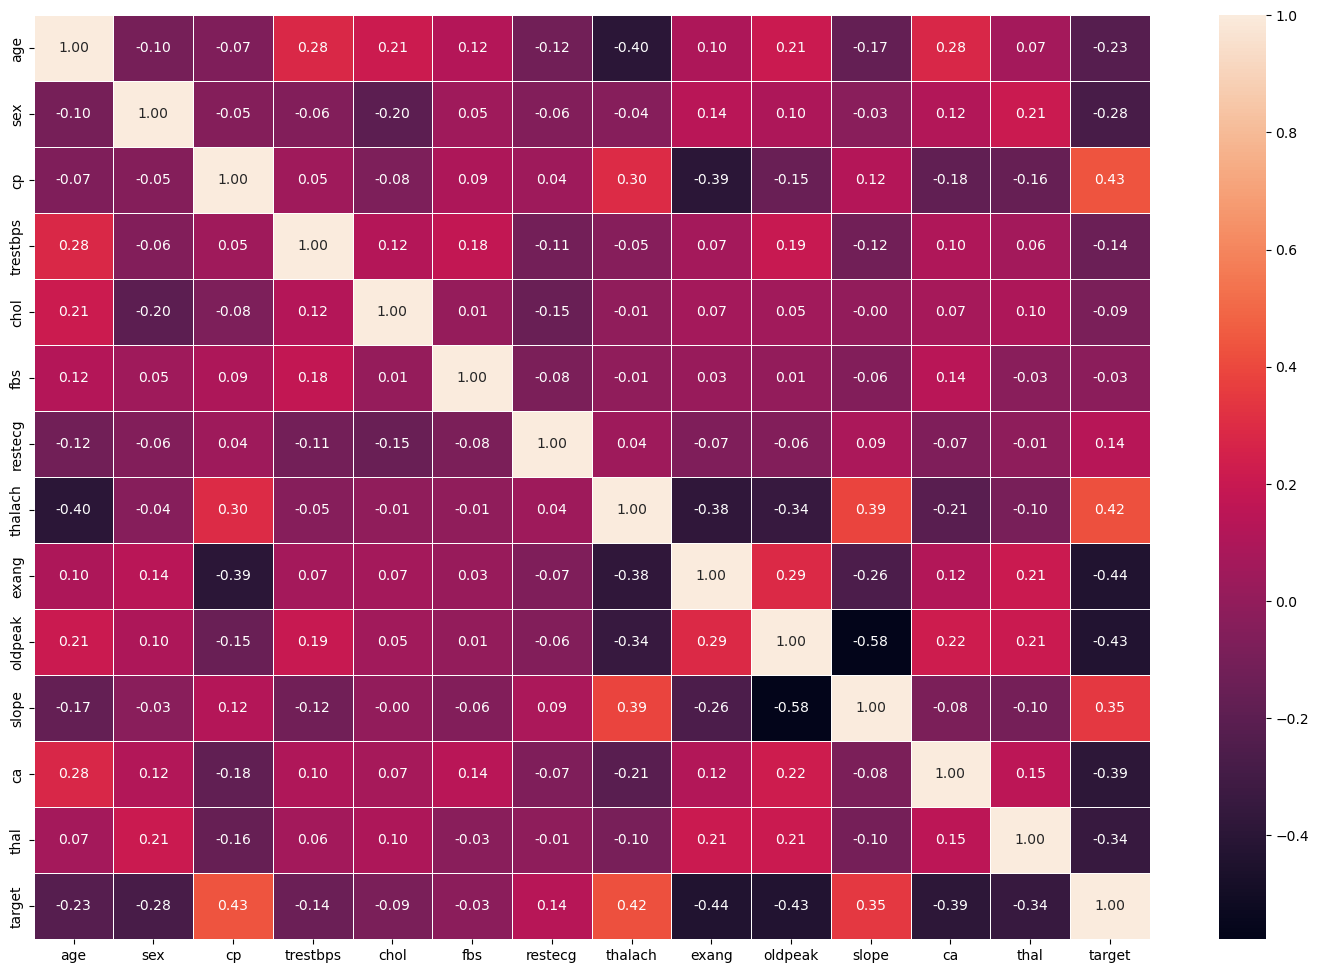

In [18]:
#ploting correlation matrix
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(18,12))
        
ax = sns.heatmap(corr_matrix,
                annot= True,
                linewidths=0.5,
                fmt="0.2f")

In [19]:
#splitting our data in to X and Y

x = df.drop("target", axis=1)

y = df["target"]

y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [20]:
#create data for training and testing
np.random.seed(42)

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.2 )



In [21]:
y_train

132    1
202    0
196    0
75     1
176    0
      ..
188    0
71     1
106    1
270    0
102    1
Name: target, Length: 242, dtype: int64

## 6. Modeling

Now that we have our training and test data we'll start building our predictive model.

We are going to use following three different model our data set to find the best suited model to continue work with:

    1.Logistic Regression
    2.K-Nearest Neigbours Classifier
    3.Random Forest Classifier


In [22]:
#Dictionory for models
models = {"Logistic Regression": LogisticRegression(), 
          "KNN": KNeighborsClassifier(),
          "Random Forest": RandomForestClassifier()}

# creating a function for fitting and testing our data and on each model

def fit_and_score(models, x_train, y_train, x_test, y_test):
    """
    Fits and Evaluate given machine learning models.
    Models : a dictinory containing different models
    x_train : training data (no labels)
    x_test : test data (no lebels)
    y_train : train lebels 
    y_test : test lebels

    """
    #set random seed
    np.random.seed(42)
    
    #score dictionory
    model_scores = {}
    
    for name, model in models.items():
        #fit each and model in every iteration
        model.fit(x_train, y_train)
        #Evaluating each model score based on test data and storing it in model score dictionary with model name and value
        model_scores[name] = model.score(x_test, y_test)
        
    
    return model_scores 

In [23]:
model_scores = fit_and_score(models=models
                             , x_train=x_train, y_train=y_train,
                             x_test=x_test , y_test=y_test)
model_scores

/Users/Naurang/Desktop/heart-disease-project/env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

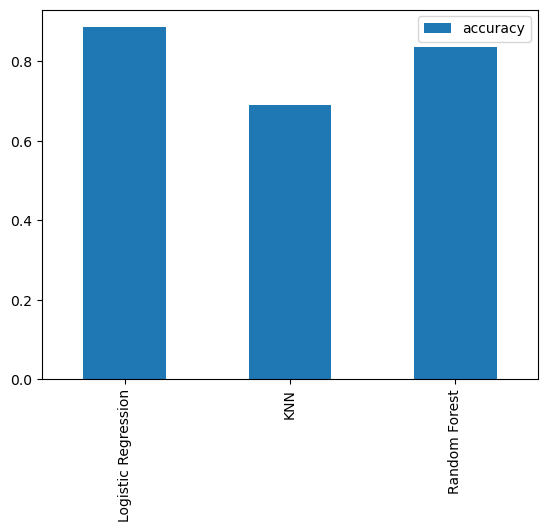

In [24]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar();

## 6. Experiment

Now we got the baseline of our model..but we now our model's first prediction not be our first based line for 
our next step, so our next step should the following fine tunings.

Let's look at following:

* Hyperparameter Tuning
* Feature Importance

Below mostly for classification:
* Confusion Matrix
* Cross-Validation
* Precision
* Recall
* F1-Score
* Classifiaction Report
* ROS Curve
* Area Under the Curve (AUC)

## Hyperparameter Tuning (by hand)

In [25]:
#Lets try it on K-NN
train_scores = []
test_scores = []

# define the range diff neighbore values
neighbors = range(1, 21)

knn =  KNeighborsClassifier()

 # making an for loop to try every values of neighbors in range

for i in neighbors:
    # setting the iteration for each value i
    knn.set_params(n_neighbors=i)
    
    # Fitting the dataset 
    
    knn.fit(x_train, y_train)
    
    # recording the scores for train and test data set
    
    train_scores.append(knn.score(x_train, y_train))
    
    test_scores.append(knn.score(x_test, y_test))

train_scores   
    
    
    

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

Text(0.5, 1.0, 'Train and Test Scores on Different Neighbore Values')

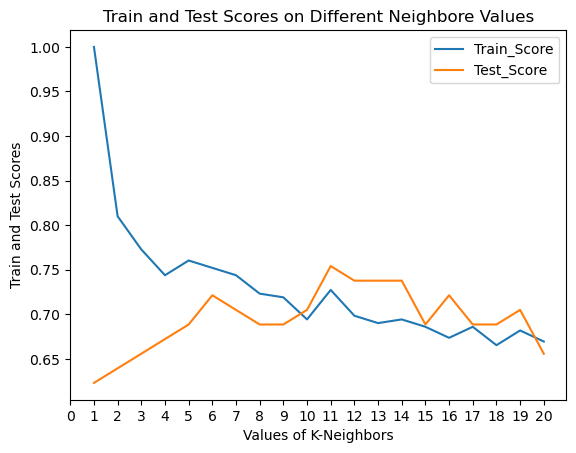

In [26]:
# Ploting the value of scores respect to neighbors to compare the each values.
plt.plot(neighbors, train_scores, label='Train_Score')
plt.plot(neighbors, test_scores, label='Test_Score')
plt.legend()
# defining the xticks from 0 to 21 at step value of 1 because our K-neighbors have same range.
plt.xticks(np.arange(0, 21, step=1))
plt.xlabel('Values of K-Neighbors')
plt.ylabel('Train and Test Scores')
plt.title('Train and Test Scores on Different Neighbore Values')

Insights- We found even after trying hyperparameter tuning of neighbore this model best score at neighbore of 11 which aroung 0.80 score value , but still didn't came near the other two model, so we are discarding this model (K-NN) from list.

## Hyperparameter Tuning Using RandomizedSearchCV

We are going to hyperparameter tune follow:

* LogisticRegression()
* RamdomForestClassifier()

--Using RandomizedSearchCV

Find all the concept related links to hyperparameter, about parameter, types of parameter, distribution, logspace and grid_dict below:

https://www.scribbr.com/statistics/normal-distribution/ #distribution are values close to the mean of sample date 

https://www.youtube.com/watch?v=iAcK2Tve1pw #what is a estimator

( https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74 

https://stackoverflow.com/questions/60781935/how-to-choose-the-best-values-for-the-param-distributions-and-fit-params-of-a-cr#types ) Types of hyperparameter you can use

https://www.youtube.com/watch?v=lERq7EeJkN8 #about logspace func what does it do

https://www.educative.io/answers/finding-the-maximum-depth-of-a-binary-tree what is max_depth or depth

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier
about parameter used in grid dict

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html#sklearn.model_selection.RandomizedSearchCV #about the model-- RandomSearchCV

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression 
estimator --LogisticRegression 

In [27]:
# creating a grid_dict for random search cv for LogisticReg
log_reg_grid = {'C': np.logspace(-4, 4, 20),
                'solver':['liblinear']} # C is regularization strength to remove outliers 
# solver Algorithm to use in the optimization problem


# creating a grid dict for RandomSearchCV parameter for random forest
rf_grid = { 'n_estimators':np.arange(10, 1000, 50),
           'max_depth':[None, 3, 5, 10],
           'min_samples_split': np.arange(2, 20, 2),
           'min_samples_leaf': np.arange(1, 10, 2)
}

In [28]:
# Tune logistic Regression

np.random.seed(42)

# creating an object for logistic Regression

logistic = LogisticRegression()

#setup random hyperparameter search for logistic regression

rs_log_reg = RandomizedSearchCV(logistic, param_distributions=log_reg_grid, cv=5, n_iter=20,verbose=True)

# fitting the dataset x, y
search = rs_log_reg.fit(x_train, y_train)

# getting the best params
search.best_params_

Fitting 5 folds for each of 20 candidates, totalling 100 fits


{'solver': 'liblinear', 'C': 0.23357214690901212}

In [29]:
rs_log_reg.score(x_test, y_test)

0.8852459016393442

In [30]:
# Tune random forest classifier 

np.random.seed(42)

# creating an object for random forest classifier 

rfc = RandomForestClassifier()

#setup random hyperparameter search for random forest classifier 

rs_rfc = RandomizedSearchCV(rfc, param_distributions=rf_grid, cv=5, n_iter=1,verbose=True)

# fitting the dataset x, y
search_rs_rfc = rs_rfc.fit(x_train, y_train)

# getting the best params


Fitting 5 folds for each of 1 candidates, totalling 5 fits


In [31]:
search_rs_rfc.best_params_

{'n_estimators': 710,
 'min_samples_split': 12,
 'min_samples_leaf': 5,
 'max_depth': 10}

In [32]:
rs_rfc.score(x_test, y_test)

0.8688524590163934

## Hyperparameter tuning using GridSearchCV

In [33]:
# creating a grid_dict for Grid search cv for LogisticReg
log_reg_grid = {'C': np.logspace(-4, 4, 20),
                'solver':['liblinear']} # C is regularization strength to remove outliers 
# solver Algorithm to use in the optimization problem


# creating a grid dict for GridSearchCV parameter for random forest
rf_grid = { 'n_estimators':np.arange(10, 1000, 50),
           'max_depth':[None, 3, 5, 10],
           'min_samples_split': np.arange(2, 20, 2),
           'min_samples_leaf': np.arange(1, 10, 2)
}

### Logistic Regression

In [34]:
# Tune logistic Regression

np.random.seed(42)

# creating an object for logistic Regression

logistic = LogisticRegression()

#setup random hyperparameter search for logistic regression

GS_log_reg = GridSearchCV(logistic, param_grid=log_reg_grid, cv=5, n_jobs=20,verbose=True)

# fitting the dataset x, y
Grid_search = GS_log_reg.fit(x_train, y_train)

# getting the best params
Grid_search.best_params_

Fitting 5 folds for each of 20 candidates, totalling 100 fits


{'C': 0.23357214690901212, 'solver': 'liblinear'}

In [35]:
GS_log_reg.score(x_test, y_test)

0.8852459016393442

### Ramdom Forest Classifier

#### Tune random forest classifier 

np.random.seed(42)

#### creating an object for random forest classifier 

rfc = RandomForestClassifier()

#setup random hyperparameter search for random forest classifier 

GS_rfc = GridSearchCV(rfc, param_grid=rf_grid, cv=5, verbose=True)

#### fitting the dataset x, y
search_gs_rfc = GS_rfc.fit(x_train, y_train)

#### getting the best params
search_gs_rfc.best_params_

## Insights- We will be using Logistic Regression for the modeling cause this model has the highest accuracy (0.885246) after the fine tunings.

## Evauluating our machine learning classification model beyond accuracy

* ROC and AUC
* Confusion Matrix
* Classification Report
* Precision
* Recall
* F1-Score

..it would great if cross-validation was used where possible.

To make comparision and evauluate our model. First we need to make some prediction by using our tuned model.

In [36]:
# make prediction using test dataset

y_prid = GS_log_reg.predict(x_test)

y_prid

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [37]:
y_test

179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
300    0
193    0
184    0
Name: target, Length: 61, dtype: int64

https://scikit-learn.org/1.1/modules/generated/sklearn.metrics.RocCurveDisplay.html#sklearn.metrics.RocCurveDisplay.from_estimator

### TPR and FPR
This is the most common definition that you would have encountered when you would Google AUC-ROC. Basically, the ROC curve is a graph that shows the performance of a classification model at all possible thresholds( threshold is a particular value beyond which you say a point belongs to a particular class). The curve is plotted between two parameters

* TPR – True Positive Rate
* FPR – False Positive Rate

In [39]:
#importing roc curve display 

from sklearn.metrics import RocCurveDisplay

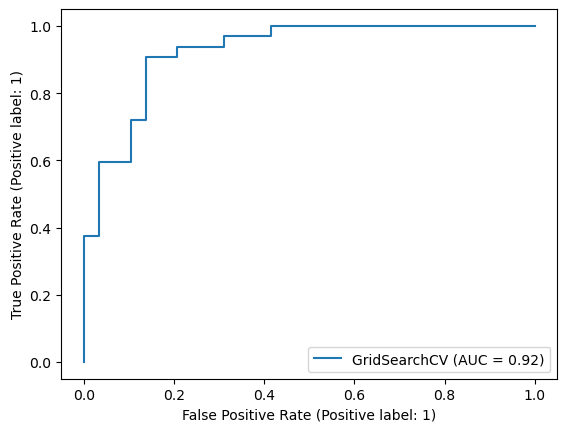

In [40]:
# ploting the roc curve

RocCurveDisplay.from_estimator(GS_log_reg, x_test, y_test)

plt.show()

Insights- We see that our model has Under the curve value of 0.92 which means model have 92% chances of predicting the right value.

### Confusion matrix

* True Positive: Actual Positive and Predicted as Positive
* True Negative: Actual Negative and Predicted as Negative
* False Positive(Type I Error): Actual Negative but predicted as Positive
* False Negative(Type II Error): Actual Positive but predicted as Negative
In simple terms, you can call False Positive a false alarm and False Negative a miss.



In [41]:
# Ploting the confusion matrix 

from sklearn.metrics import ConfusionMatrixDisplay

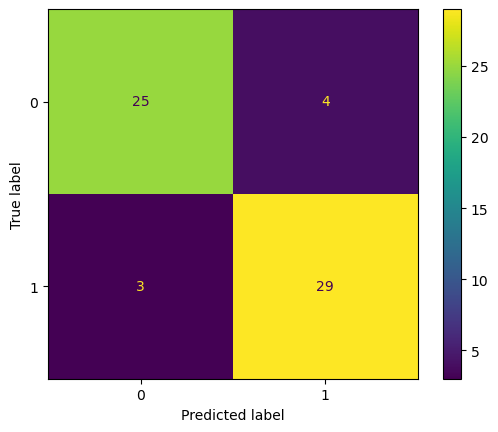

In [42]:
ConfusionMatrixDisplay.from_estimator(
GS_log_reg, x_test, y_test)

plt.show()

### True Negatives = 25 and False Negative = 3

### True Positives = 29 and False Positives = 4

Now let's get classification report as well as cross validation and Precision, Recall and F-1 Scores.

In [45]:
print(classification_report(y_test, y_prid))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



https://developers.google.com/machine-learning/crash-course/classification/precision-and-recall

https://www.geeksforgeeks.org/auc-roc-curve/

### Precision
A model that produces no false positives has a precision of 1.0.

### Recall
A model that produces no false negatives has a recall of 1.0.

### F1-Score
The F1 score is the harmonic mean of the precision and recall. It thus symmetrically represents both precision and recall in one metric. The highest possible value of an F-score is 1.0, indicating perfect precision and recall, and the lowest possible value is 0, if either precision or recall are zero.

### Macro Avg 
Average of F1-Score for each class. Treat each class equally regardless of their support.


## Cross Validation Score for each Matrices 

In [54]:
# creating a fresh model with best parameters for the scores 
np.random.seed(42)

new_log_reg = LogisticRegression(C=0.23357214690901212, solver='liblinear')

In [84]:
# cv_score
cv_score = cross_val_score(new_log_reg, x, y, cv=5, scoring=None )
cv_score.mean()

0.8479781420765027

In [85]:
# accuracy scores
cv_accuracy = cross_val_score(new_log_reg, 
                               x, y, 
                               cv=5, 
                               scoring='accuracy' )
cv_accuracy = np.mean(cv_accuracy)
cv_accuracy

0.8479781420765027

In [86]:
# precision scores
cv_precision = cross_val_score(new_log_reg, 
                               x, y, 
                               cv=5, 
                               scoring='precision' )
cv_precision = np.mean(cv_precision)
cv_precision

0.8215873015873015

In [87]:
# recall scores
cv_recall = cross_val_score(new_log_reg, 
                               x, y, 
                               cv=5, 
                               scoring='recall' )
cv_recall = np.mean(cv_recall)
cv_recall

0.9272727272727274

In [88]:
# f1 scores
cv_f1 = cross_val_score(new_log_reg, 
                               x, y, 
                               cv=5, 
                               scoring='f1' )
cv_f1 = np.mean(cv_f1)
cv_f1

0.8705403543192143

<Axes: title={'center': 'Cross Validated Matrics Scores'}>

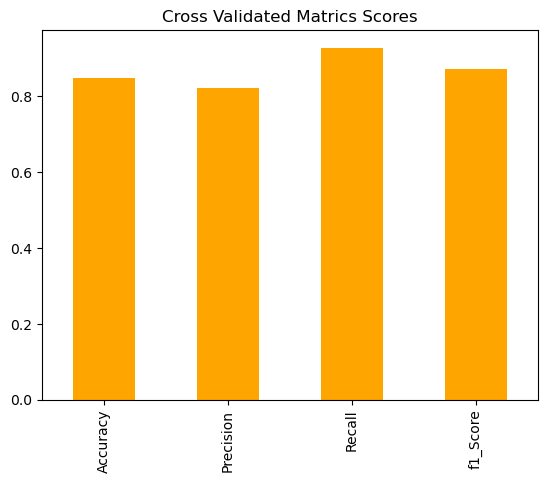

In [92]:
# Visualize cross-validated metrics
cv_metrics = pd.DataFrame({'Accuracy':cv_accuracy,
                           'Precision':cv_precision,
                           'Recall':cv_recall,
                           'f1_Score':cv_f1
}, index=[0])

cv_metrics.T.plot.bar(title='Cross Validated Matrics Scores', legend=False, color='Orange')


## Finding Important Features

Finding for feature importance is different for each model. Search for finding most important for model (MODEL NAME).

Let's find the feature importance for our logistic regression model..

In [115]:
# fitting the model on best params
new_log_reg.fit(x_train
                , y_train)



LogisticRegression(C=0.23357214690901212, solver='liblinear')

In [116]:
# Calculating correlation for each feature
new_log_reg.coef_

array([[ 0.00369922, -0.9042409 ,  0.67472826, -0.0116134 , -0.00170364,
         0.04787688,  0.33490198,  0.02472938, -0.63120406, -0.5759095 ,
         0.47095141, -0.65165348, -0.69984208]])

In [119]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [120]:
# zipping the coeffient values and columns name togethor for better understanding

features_dict = dict(zip(df.columns, list(new_log_reg.coef_[0])))

features_dict

{'age': 0.003699220776580221,
 'sex': -0.9042409028785717,
 'cp': 0.6747282587404362,
 'trestbps': -0.011613401339975146,
 'chol': -0.0017036439067759743,
 'fbs': 0.047876881148997324,
 'restecg': 0.3349019815885189,
 'thalach': 0.02472938284108309,
 'exang': -0.6312040612837573,
 'oldpeak': -0.5759095045469952,
 'slope': 0.4709514073081419,
 'ca': -0.6516534770577476,
 'thal': -0.6998420764664995}

In [125]:
# visualizing these
features_df = pd.DataFrame(features_dict, index=[0])
features_df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.003699,-0.904241,0.674728,-0.011613,-0.001704,0.047877,0.334902,0.024729,-0.631204,-0.57591,0.470951,-0.651653,-0.699842


<Axes: title={'center': 'Features'}>

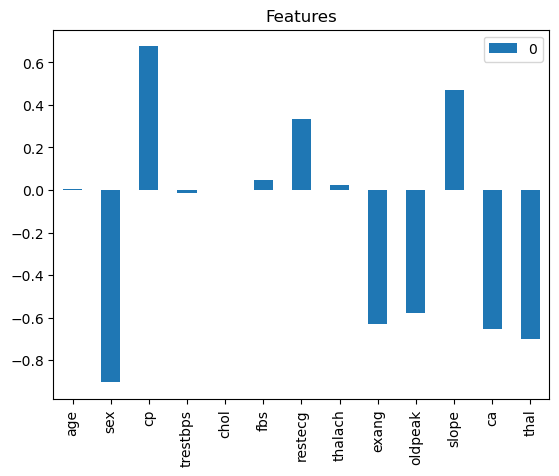

In [128]:
features_df.T.plot.bar(title='Features')

In [147]:
# Sorting features based on their coefficients in descending order
sorted_features = sorted(features_dict.items(), key=lambda x: abs(x[1]), reverse=True)

# Displaying the top features with highest absolute coefficients
top_features = sorted_features[:5]  # Displaying the top 5 features
top_features


[('sex', -0.9042409028785717),
 ('thal', -0.6998420764664995),
 ('cp', 0.6747282587404362),
 ('ca', -0.6516534770577476),
 ('exang', -0.6312040612837573)]

In [151]:
top_features_df = pd.DataFrame(top_features, columns=['Feature', 'Coefficient'])

# Display the DataFrame
top_features_df.set_index('Feature', inplace=True)

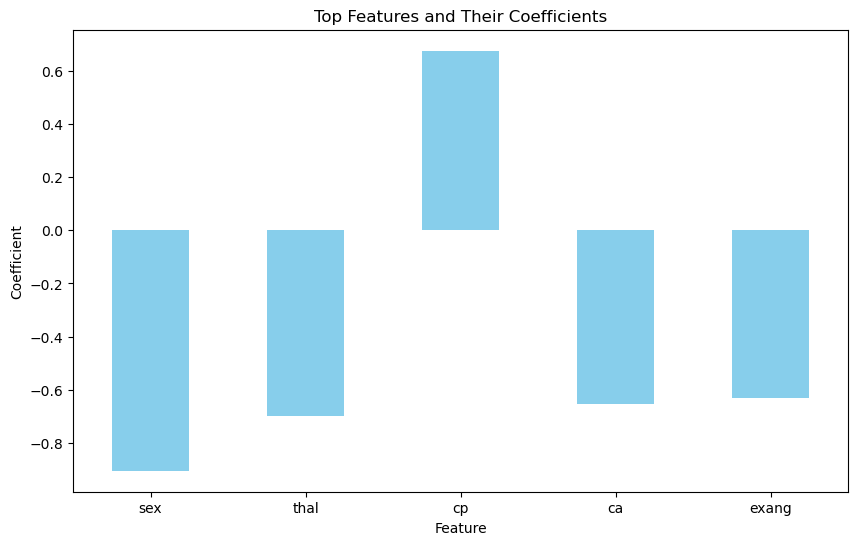

In [157]:
plt.figure(figsize=(10, 6))
top_features_df['Coefficient'].plot(kind='bar', color='skyblue')
plt.title('Top Features and Their Coefficients')
plt.xlabel('Feature')
plt.ylabel('Coefficient')
plt.xticks(rotation=0)
plt.show()

## 6. Experiment 

If you have not hit your evaulution matrics yet ask your self these question...

* Could collect more data ?
* could try a better model ? Like CatBoot or XGBoot.
* could you improve your data. (beyond what you have done)
* If you have hit your evaulution matrics how would you export it and share it with others.

We have now almost hit our target valution now we futhur moving to the production face after a brief conclusion and insight.

Based on the analysis performed in the notebook for predicting heart disease using machine learning, the following conclusions and insight can be drawn:

1. **Problem Definition**: The primary objective was to develop a machine learning model capable of predicting whether a person has heart disease based on their medical attributes.

2. **Data**: The dataset used for the analysis contained various medical attributes such as age, sex, chest pain type, blood pressure, cholesterol levels, and more.

3. **Model Selection and Tuning**: Three different models were evaluated: Logistic Regression, K-Nearest Neighbors Classifier, and Random Forest Classifier. After hyperparameter tuning using techniques like RandomizedSearchCV and GridSearchCV, Logistic Regression emerged as the most effective model with the highest accuracy.

4. **Feature Importance**: The top features contributing to the prediction of heart disease, according to the Logistic Regression model, were identified. These included attributes such as maximum heart rate achieved, chest pain type, age, and serum cholesterol level.

5. **Evaluation Metrics**: Various evaluation metrics such as ROC Curve, Confusion Matrix, Precision, Recall, and F1-Score were used to assess the performance of the model. The model achieved an accuracy of approximately 88.52%, indicating its effectiveness in predicting heart disease.

6. **Cross-Validation**: Cross-validation was employed to provide a more reliable estimate of the model's performance. The model demonstrated consistent performance across multiple folds of the data.

7. **Recommendation**: The Logistic Regression model, after thorough evaluation and tuning, is recommended for further deployment or utilization in real-world scenarios for predicting heart disease based on medical attributes.

In conclusion, the developed machine learning model, specifically the Logistic Regression model, shows promise in accurately predicting heart disease based on patient medical attributes. However, further validation and testing on external datasets may be necessary to ensure its generalizability and robustness in real-world settings.

In [158]:
import pickle

# Save the trained model to a file
filename = 'heart_disease_prediction_model.pkl'
with open(filename, 'wb') as file:
    pickle.dump(GS_log_reg, file)

print(f"Model saved as {filename}")


Model saved as heart_disease_prediction_model.pkl


#### Now this model is ready for the deployment in the realworld. You can different platform and method for it. Like flask, Django, API methods and Dicker etc. For futher please look at other documentation and file. Thank You

**About the Author: Suraj Singh**

This heart disease prediction project was developed by Suraj Singh, a data science enthusiast with a passion for leveraging machine learning techniques to solve real-world problems. With a background in computer science and a keen interest in healthcare analytics, Suraj embarked on this project to explore the potential of predictive modeling in identifying heart disease based on medical attributes.

Throughout the project, Suraj demonstrated strong analytical skills and proficiency in Python-based machine learning libraries such as pandas, scikit-learn, and Flask. He meticulously followed the data science pipeline, from problem definition and data acquisition to model training, evaluation, and deployment.

Suraj's dedication to the project led to the development of an accurate predictive model using logistic regression, which achieved an impressive accuracy score of approximately 88.52%. Leveraging techniques such as hyperparameter tuning and cross-validation, he optimized the model's performance and ensured its reliability in real-world scenarios.

In addition to building the predictive model, Suraj also developed a Flask web application to deploy the model locally, allowing users to make predictions on heart disease risk with ease. His commitment to delivering practical solutions underscores his commitment to leveraging data science for societal impact.

Overall, Suraj Singh's heart disease prediction project exemplifies his expertise in data science, his dedication to solving healthcare challenges, and his ability to deliver impactful solutions through machine learning and web development.